## Analytical Report for the Stock Connect Program in China
Group 3, ZHANG, Jian (219012058), ZENG, Ying (219012027), HOANG, Nam Nguyen (219400001)

### I.  Introduction
We witness the stock price goes up and down and the trade volumes change frequently so we are eager to find out the inner logic and influence factors for the fluctuation. Moreover, some people claim that the higher liquidity, the higher probability to flourish the economic market. Stock Connect allows smaller trading firms and hedge funds to access A-share market, who cannot reach the requirements of the Qualified Investor programs, arousing global liquidity boost. The Stock Connect opens China's capital markets to international investors by providing access to mainland-listed A-shares and allows domestic investors to access stocks listed outside the Mainland. A Stock Connect programs as example is securities trading arrangements that link China's mainland stock exchanges to that of Hong Kong (SHSC on November 17,2014).


### II. Data Management

#### Data cleaning

In order to seek the influence of stock connect, we obtained data from September 2014 to January 2015, covering the launch date of SHSC. We found that there are some testing data (contain 'z', 'mad', TEST', 'Y' in security name) and data dated on Saturday, which are duplicated or useless for our analysis so we excluded them via code ‘~shh_ref_df['RIC'].str.contains('xxx')’.

#### Data Group and Calculation

Then we calculate basic trading statistics (Total trade volume/value/count, Total quote count, Quote to trade ratio, Trade size), time-weighted quoted spread and value-weighted effective spread, intra-day volatility, order-to-trade ratio for Huatai Securities GDR and use code to find the examples of different types of entry. We use R-square, the p-value of F-statistic and confidence interval to confirm that our models are appropriate. As we want to find out the effect of stock connect, we divide data into two groups, one group as testing group is stocks joined SHSC and the other group as control group is stocks did not join SHSC, and check if they fluctuate significantly in statistic after the launch of SHSC.

### III. Analysis

Effect of launch and reasons

From the bar chart for daily trade volume and value, the trade volume and value were stable after the SHSC launch date. Set the trade volume and value on November 14, 2014 as basis, they met a small peak on November 24 (third times for both trade volume and value), drop dramatically on December 24(one third for both trade volume and value) and then reached top on January 12, 2015 (ten times for both trade volume and value). The bloomy situation has not appeared because: 
- i) the opportunity of short-term arbitrary has gone, the price of some A+H stocks is higher than A stocks leading no extreme big valuation difference; 
- ii) Lots of financial institutes still waited for investment guidance issued by supervisor; 
- iii) familiarity for the rules and skills about investment in other market. 

After a period of analysis and the recovery of economy, which made investor believe the prediction of the bull market, the liquidity increase sharply in 2015.

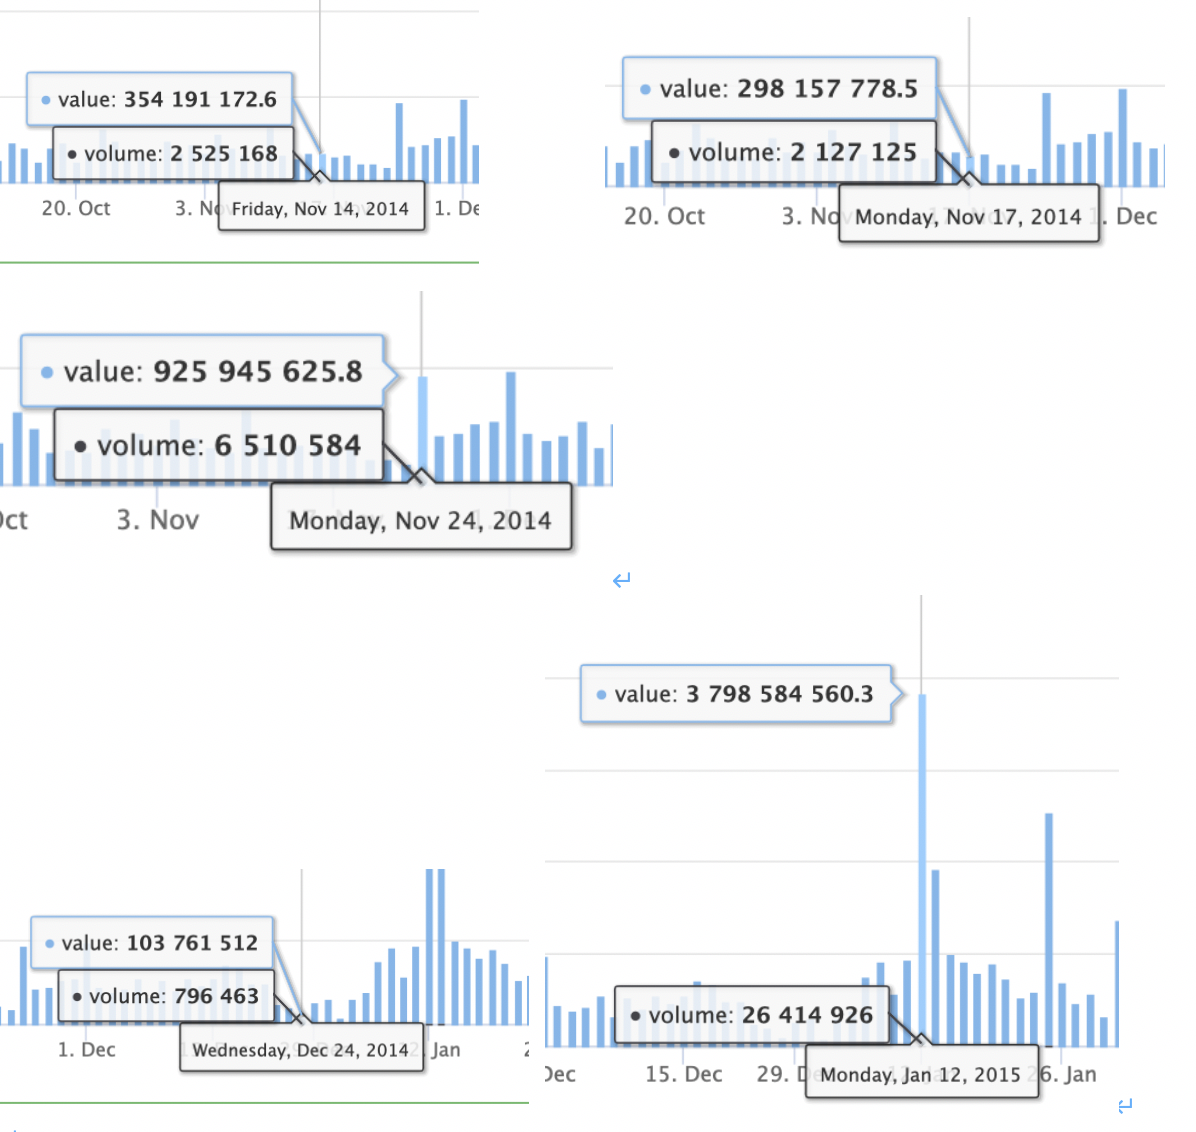

In [17]:
options_line = OPTIONS_DEFAULT
options_line['yAxis'] = [{'opposite': False, 'title':{'text': 'volume'},'tickAmount':8 },
                    {'opposite':True, 'title':{'text':'value'}, 'tickAmount':8}]

# event_dict = {'2015-01-12': 'Market Event 1', '2015-01-23': 'Market Event 2'}
# for date in event_dict:
#     date_object = dt.datetime.strptime(date, '%Y-%m-%d')
#     line = plotline(date_object, event_dict[date])
#     try:
#         options_line['xAxis']['plotLines'].append(line)
#     except KeyError:
#         options_line['xAxis']={'plotLines': [line]}

Line_Chart = Highstock()
Line_Chart.set_dict_options(options_line)

Line_Chart.add_data_set(HKG_0001.filter(['date','trade_volume_count']).values.tolist(), name='daily total trading volume', yAxis=0)
Line_Chart.add_data_set(HKG_0001.filter(['date','trade_value_count']).values.tolist(), name='daily total trading value', yAxis=1)

Line_Chart

![](./Launch.png)
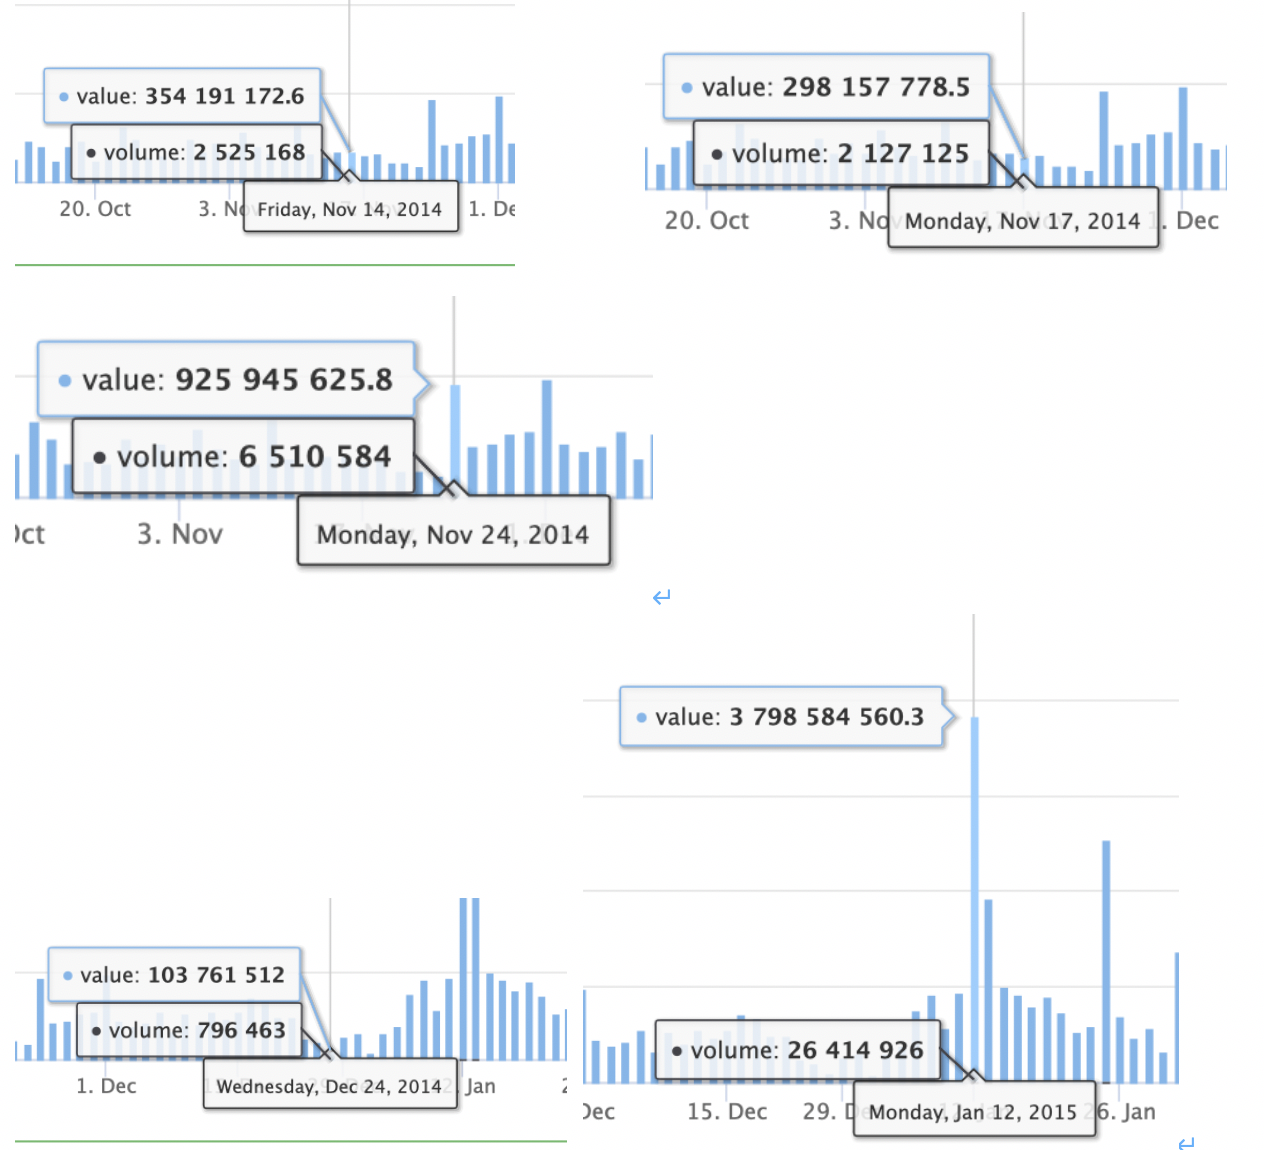

#### Example -- stocks involved in SHSC

We also take the value trend of 600000.SS and 0001.HK as example, both are enrolled in the stock connect program, and it reveal that the SHSC provide more benefit to stocks in Shanghai, following the illustration earned from general comparison which compares testing group and control group in Shanghai and Hongkong separately.

In [19]:
# 600000.SS vs 0001.HK, both are enrolled in the stock connect program

options_line = OPTIONS_DEFAULT
options_line['yAxis'] = [{'opposite':False, 'title':{'text':'value'}, 'tickAmount':8}]
options_column['title'] = {'text': 'Value Trend of 600000.SS vs 0001.HK'}

event_dict = {'2014-11-17': 'Market Event 1'}
for date in event_dict:
    date_object = dt.datetime.strptime(date, '%Y-%m-%d')
    line = plotline(date_object, event_dict[date])
    try:
        options_line['xAxis']['plotLines'].append(line)
    except KeyError:
        options_line['xAxis']={'plotLines': [line]}

Line_Chart = Highstock()
Line_Chart.set_dict_options(options_line)

SHH_example = SHSC_SHH_df[SHSC_SHH_df['name'] == '600000.SS']
Line_Chart.add_data_set(SHH_example.filter(['date','trade_value_count']).values.tolist(), name='600000.SS', yAxis=0)
Line_Chart.add_data_set(HKG_0001.filter(['date','trade_value_count']).values.tolist(), name='0001.HK', yAxis=0)

Line_Chart

### III. Analysis

General view on effect on liquidity and volatility

The launched of stock connect has little effect on volatility but still has positive effect on the value, volumn and liquidity of stocks involved in stock connect. We will explain them one by one.

![](./VV.png)

The trend of trade volume and value for stocks involved in stock connect fluctuates more significantly compared with those not involved. the stocks chosen as part of SHSC (blue line) are those who are more popular in investors’ view so their volume and value are both higher than those not chosen (black line).

For Shanghai Stock, the value and volume incline more steadily than Hongkong as Hongkong Stock Exchange is more opened than Shanghai Stock Exchange and it has already absorbed lots of foreign investors before SHSC launched. Thus, more foreign investors purchase Shanghai stocks at the period after the launched date. 

The stock connect has positive effect on trade volume and value especially in Shanghai.

![](./spread.png)

In both cases, the stocks included in the stock connect programs (blue line) have higher liquidity even before the launch of the programs. After the start, the difference between quoted spreads increases slightly, mainly driven by increased spreads for non-SHSC stocks. The quoted spreads of the SHSC stocks remain flat over the entire observed period while the spreads of the non-SHSC stocks seem to be more volatile. 

The stock connect has little effect on the liquidity of stocks involved in Stock Connect but has negative effect on stocks not involved in Stock Connect.

![](./volatility.png)

The SHSC has more influence on Shanghai stocks tham Hongkong stocks as the volatility upward damatically in December but the effect on test group and control group are smiliar. The difference for volatility in Hongkong stocks is larger than that in Shanghai, which might means that Hongkong stocks chosen in SHSC are more stable. In general, the launch of stock connect has little effect on volatility.

#### DID analysis

To further discover the effect of the launch of stock connect, we used difference in difference (“DID”) model to find the relationship. The fix panel data are divided into test group and control group following previous grouping and the entity effect and time effect are set as true in this situation. 

The testing group and significant change after launched date are set as dummy equals to 1 and the opposite as dummy equals to 0. For DID analysis, volatility, time weighted quoted spread and trade volume count were set as y both in Shanghai and Hongkong stock market separately. 

#### Results and interpretation

In these models, all of the p-value for F-statistic are small (less than 0.0001). The launch of stock connect has greater effect on time weighted quoted spread and volatility in HongKong as R-square is 0.4 and 0.3 respectively. Per refer to the parameter and the other estimation summary, the launch of stock connect has positive influence on volatility and negative effect on time weighted quoted spread in Shanghai. On the contrary, The launch of stock connect has negative effect on volatility and time weighted quoted spread in Hongkong.
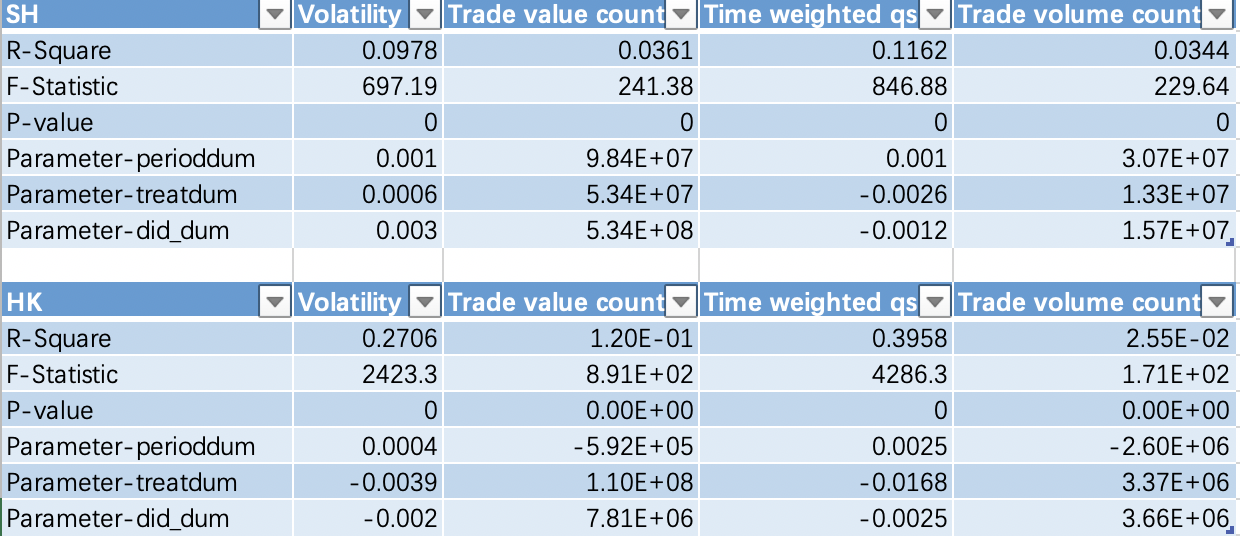

![](./summary.png)

### Analysis on HTSC
With the depth data for Huatai Securities (traded on LSE) on 7th November 2019, we were able to analyze order-to-trade ratio as well as to find examples for order entry, amendment and cancellation in the data for that specific trading day.

We calculated an order-to-trade ratio of around 1.39. This number is not surprising as the data comes from London Stock Exchange where high frequency traders are active (as e.g. compared to Chinese stock exchanges where there is less activity from market participants with strategies that include submitting orders without the intention of an actual trade) and thus there is a significantly higher number of orders than trades.

In [4]:
HTSC_TAS_File = open('../Lecture_11_Student/data/HTSC_TAS.csv', mode='rt')
HTSC_TAS_Data = csv.DictReader(HTSC_TAS_File)
Market_Is_Open = False

Trade_Count = 0
Quote_Count = 0

for transaction in HTSC_TAS_Data:

    if transaction['Type'] == 'Mkt. Condition':
        if 'TRD' in transaction['Qualifiers']:
            Market_Is_Open = True
        else:
            Market_Is_Open = False

    if Market_Is_Open:
        if transaction['Type'] == 'Trade':
            Trade_Count += 1
        if transaction['Type'] == 'Quote':
            Quote_Count += 1
            
print('order-to-trade ratio:', (Quote_Count - Trade_Count) / Trade_Count)

order-to-trade ratio: 1.3898305084745763


Using both depth and time-and-sales data for 7th November 2019, we identified examples for order entry, amendment and cancellation by inspecting changes in depth at different price levels while at the same time taking possible simultaneous trades into consideration.

In [13]:
# Order entry
order_condition = (df['L1-BidSize'] > 0) & (df['L1-BuyNo'] > 0) & (df['L2-BidSize'] == 0) & (df['L2-BuyNo'] == 0) & \
                  (df['L3-BidSize'] == 0) & (df['L3-BuyNo'] == 0) & (df['L4-BidSize'] == 0) & (df['L4-BuyNo'] == 0) & \
                  (df['L5-BidSize'] == 0) & (df['L5-BuyNo'] == 0)
df[order_condition]

,L1-BidSize,L1-BuyNo,L2-BidSize,L2-BuyNo,L3-BidSize,L3-BuyNo,L4-BidSize,L4-BuyNo,L5-BidSize,L5-BuyNo
24,75.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,490.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,610.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,584.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,2321.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2539,185.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2543,185.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2560,489.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2562,410.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Amendment
amendment_condition = (df['L1-BidSize'] > 0) & (df['L1-BuyNo'] > 0) & (df['L2-BidSize'] < 0) & (df['L2-BuyNo'] < 0)
df[amendment_condition]

,L1-BidSize,L1-BuyNo,L2-BidSize,L2-BuyNo,L3-BidSize,L3-BuyNo,L4-BidSize,L4-BuyNo,L5-BidSize,L5-BuyNo
32,34010.0,2.0,-33988.0,-2.0,53.0,0.0,1350.0,0.0,9500.0,0.0
293,2974.0,2.0,-3116.0,-2.0,-126.0,0.0,1350.0,0.0,0.0,0.0
313,3044.0,3.0,-3541.0,-3.0,53.0,0.0,-126.0,0.0,1350.0,0.0
2255,7846.0,2.0,-9686.0,-2.0,9500.0,0.0,-9850.0,0.0,1350.0,0.0
2333,9686.0,2.0,-186.0,-2.0,-9850.0,0.0,1350.0,0.0,0.0,0.0
2338,10168.0,2.0,-9686.0,-2.0,9500.0,0.0,-9850.0,0.0,1350.0,0.0
2381,266.0,1.0,-494.0,-1.0,9500.0,0.0,-9850.0,0.0,1350.0,0.0


In [16]:
# Cancellation
amendment_condition = (df['L1-BidSize'] > 0) & (df['L1-BuyNo'] > 0) & (df['L2-BidSize'] < 0) & (df['L2-BuyNo'] == 0)
df[amendment_condition]

,L1-BidSize,L1-BuyNo,L2-BidSize,L2-BuyNo,L3-BidSize,L3-BuyNo,L4-BidSize,L4-BuyNo,L5-BidSize,L5-BuyNo
2799,7687.0,1.0,-8961.0,0.0,-3553.0,-1.0,29917.0,0.0,-20191.0,0.0


### IV. Conclusion

Generally, this gives us an answer to the fundamental question that underlies our analysis: indeed, the stock connect programs, that can be considered measures to promote and enhance an 'Market Liberalisation' and an 'Open Market', seem to have positive influence on transaction cost, little influence on volatility and liquidity of stocks involved in Stock Connect, and negative effect on the liquidity of stocks not involved in Stock Connect.